### Objective

    0. Fit AR model to recruitment data using Yule-Walker equations in matrix form
    1. Is to identify the 'lag' of recruitment data
    2. Pick the parsimonious model : Which has the simplest explanation
    

In [75]:
library('astsa')

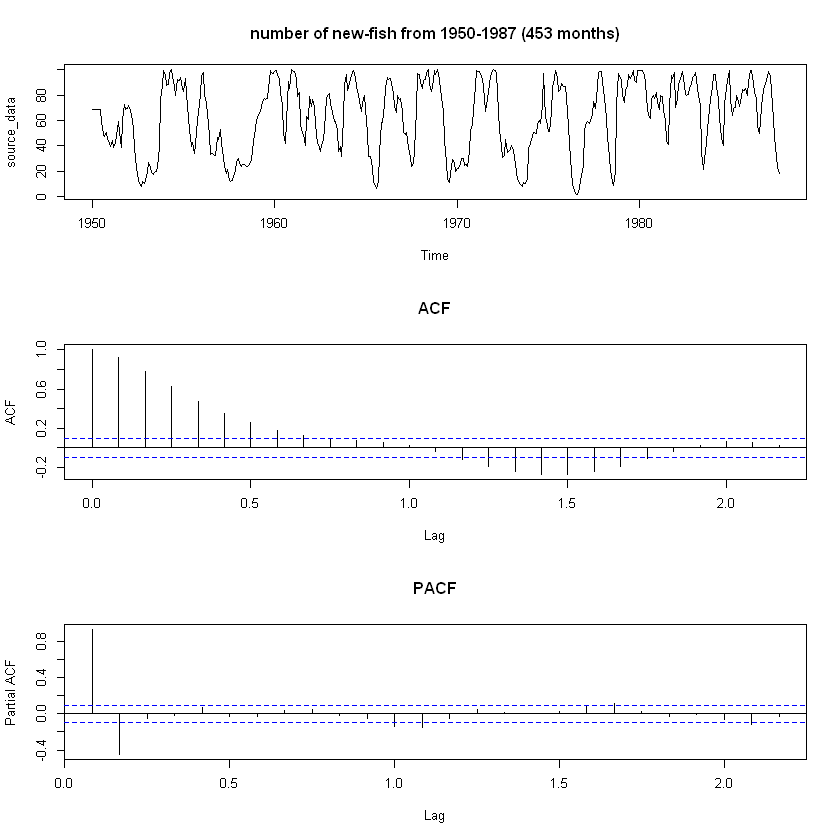

In [76]:
#help(rec)
#In this exercise we will be using 'rec' dataset from ASTSA package
#Description : Recruitment (number of new fish) for a period of 453 months ranging over the years 1950-1987.
#It is a monthly time-series data
source_data <- rec
#let's do some plotting
par(mfrow = c(3,1))
plot(source_data, main="number of new-fish from 1950-1987 (453 months)")
acf(source_data, main="ACF")
pacf(source_data, main="PACF")


#### ACF suggests that, there is some kind of a cyclic behaviour
#### PACF suggests that, there is a AR(2) process which is potentially present
#### here Idea of PARSIMONIOUS is to go with PACF because it's the simplest explanation we have 

<img src = "parsimonious_principle.PNG">

### form of the model is

<img src = "form_of_model.PNG">

#### So the goal is to estimate the parameters (intercept, coefficients, variance of white noise)

$X_t = \phi_1X_{t-1}+\phi_2X_{t-2}+Z_t $

We would like to work with mean-centered data-set

Remember the Yule-Walker equations in matrix form $\hat{R}\hat{\phi}=\hat{b}$

In [77]:
#mean centering
ar.process_mc <- source_data-mean(source_data)

#lags
p <- 2

#estimate auto-correlation coefficients
r <- c()
r[1:p] <- acf(ar.process_mc,plot=F)$acf[2:(p+1)]

#initialize R-matrix
#we know that size of R matrix is of p*p
R <- matrix(1,p,p)

#Update R matrix with correlation coeffs 
for(i in 1:p){
    for(j in 1:p){
        
        if(i !=j){
            R[i,j] <- r[abs(i-j)]
        }
        
    }
}
print("R-matrix")
R

#RHS : b value
b <- as.matrix(r)

#solve for Rx=b
phi_hat <- solve(R,b)
paste0("coefficients of AR(2) process are ",paste0(phi_hat,collapse=","))

#variance of white-noise
#var_zt <- c0*(1-sum(phi*r))
c0 <- acf(rec_mc,type='covariance',plot=F)$acf[1]
var_zt <- c0*(1-sum(phi_hat*r))
paste0("variance of white noise is ",var_zt)

#intercept of the model
phi0_hat <- mean(rec)*((1-sum(phi_hat)))
paste0("intercept of the model is ",phi0_hat)

[1] "R-matrix"


1.0000000,0.9218042
0.9218042,1.0000000


[1] "coefficients of AR(2) process are 1.33158738866791,-0.444544697634473"

[1] "variance of white noise is 94.1713101077289"

[1] "intercept of the model is 7.03303626708594"

In [78]:
#Summary is
cat("Constant:", phi0_hat," Coeffcinets:", phi_hat, " and Variance:", var_zt, '\n')

Constant: 7.033036  Coeffcinets: 1.331587 -0.4445447  and Variance: 94.17131 


[1] 1

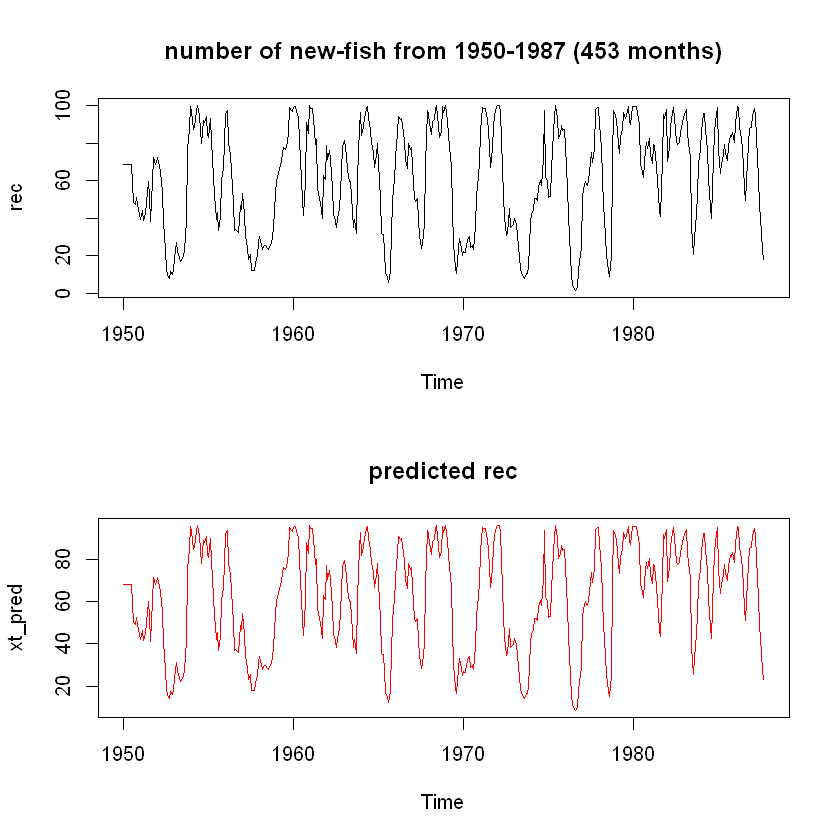

In [79]:
#actual vs fitted
xt_pred <- phi0_hat+phi_hat[1]*source_data+phi_hat[2]*source_data
cor(xt_pred,source_data)
par(mfrow = c(2,1))
plot(rec, main="number of new-fish from 1950-1987 (453 months)")
plot(xt_pred,col='red',main="predicted rec")